In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


In [4]:
data = pd.read_csv('regdata.csv', header=None, names=['Exam 1', 'Exam 2', 'Admitted'])
data.head()

,Exam 1,Exam 2,Admitted
0,70,1.0,50
1,80,2.0,55
2,65,2.0,45
3,70,2.5,60
4,65,2.7,58


In [18]:
def prepare(data):
    X = data.iloc[:,0:-1].values

    # we normalize X
    maxX = np.max(X, axis=0)
    minX = np.min(X, axis=0)
    X = (X-minX)/(maxX-minX)

    # we insert an all-ones column at index 0
    X = np.insert(X, 0, 1, axis=1)

    y = data.iloc[:,-1:].values.T

    where_are_zeros = (y==0)
    y[where_are_zeros] = -1
    
    return X,y


X,y = prepare(data)
print(X)
print(y)

[[1.      0.3125  0.     ]
 [1.      0.625   0.125  ]
 [1.      0.15625 0.125  ]
 [1.      0.3125  0.1875 ]
 [1.      0.15625 0.2125 ]
 [1.      0.625   0.25   ]
 [1.      0.9375  0.25   ]
 [1.      1.      0.275  ]
 [1.      0.      0.3125 ]
 [1.      0.3125  0.3375 ]
 [1.      0.5     0.375  ]
 [1.      0.78125 0.4375 ]
 [1.      0.625   0.5    ]
 [1.      0.      0.5625 ]
 [1.      0.125   0.6    ]
 [1.      0.      0.625  ]
 [1.      0.84375 0.625  ]
 [1.      0.9375  0.6875 ]
 [1.      0.46875 0.75   ]
 [1.      0.625   0.75   ]
 [1.      0.46875 0.8125 ]
 [1.      0.3125  0.875  ]
 [1.      0.625   0.9375 ]
 [1.      0.9375  0.9625 ]
 [1.      0.78125 1.     ]]
[[50 55 45 60 58 60 65 67 55 60 65 70 78 75 78 70 80 82 75 85 80 82 85 90
  85]]


[[47.37669399  7.9981353  37.44432694]]


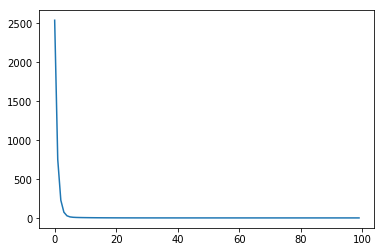

In [19]:
def fit(X,y,kappa,iter):
    
    w = np.zeros((1,X.shape[1]))
    E = []  
    n=X.shape[0]
    for num in range(iter):
        l =(1/( 2*n))*(np.sum((y-w@X.T)**2))
        E.append(l)
        w=w+kappa*((1/n)*(np.sum((y-w@X.T).T*X,axis=0,keepdims=True)))
        
        
    return w,E

        
w,E = fit(X,y,1,100)

print(w)
plt.plot(E)
plt.show()